# Navigation

---

Congratulations for completing the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893)!  In this notebook, you will learn how to control an agent in a more challenging environment, where it can learn directly from raw pixels!  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/VisualBanana.app"`
- **Windows** (x86): `"path/to/VisualBanana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/VisualBanana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/VisualBanana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/VisualBanana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `VisualBanana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="VisualBanana.app")
```

In [7]:
env = UnityEnvironment(file_name="VisualBanana.app")

I0000 00:00:1737689322.160766 18983917 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


Mono path[0] = '/Users/nuocheng/Desktop/Reinforcement_Learning/RL_Valued_Based_Method/VisualBanana.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/nuocheng/Desktop/Reinforcement_Learning/RL_Valued_Based_Method/VisualBanana.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [8]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The environment state is an array of raw pixels with shape `(1, 84, 84, 3)`.  *Note that this code differs from the notebook for the project, where we are grabbing **`visual_observations`** (the raw pixels) instead of **`vector_observations`**.* A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [9]:
def preprocess_state(states):
    # The expected input is a batch of images with dimension as
    # [batch_size, height, width, channel_num]
    image_array = states / 255.0
    grayscale_array = (0.2989 * image_array[:, :, :, 0] +
                       0.5870 * image_array[:, :, :, 1] +
                       0.1140 * image_array[:, :, :, 2])
    grayscale_array = np.expand_dims(grayscale_array, axis=1)  # [batch_size, 1, height, width]

    return grayscale_array
test_state = np.ones((1, 84, 84, 3))
print(test_state.shape)
out = preprocess_state(test_state)
print(out.shape)

(1, 84, 84, 3)
(1, 1, 84, 84)


In [10]:
# Declare agent
import importlib
import agent
import model
importlib.reload(agent)
importlib.reload(model)

GAMMA = 0.99  # discount factor

agent = agent.VisualStateAgent(brain.vector_action_space_size, GAMMA)
test_state = np.ones((4, 1, 84, 84))
print(test_state.shape)
agent.act(test_state, 0.99)

device mps
(4, 1, 84, 84)


2

In [ ]:
# Function to train the network
from collections import deque
import torch
import matplotlib.pyplot as plt


def train(agent, env, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.99):

    all_rewards = []
    rewards_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start
    for i_episode in range(n_episodes):
        env_info = env.reset(train_mode=True)[brain_name]
        state = preprocess_state(env_info.visual_observations[0])
        total_reward = 0
        eps = max(eps_end, eps * eps_decay)
        for t in range(max_t):
            # get action from the agent based on the curernt states
#             print("input state shape", state.shape)
            action = agent.act(state, eps)
            # update the env based on the action
            env_info = env.step(action)[brain_name]
            next_state = preprocess_state(env_info.visual_observations[0])
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            # update the agent
            agent.step(state, action, reward, next_state, done)
            # update for the next iteration
            state = next_state
            total_reward += reward
            # the episode reachs the end, so need to start a new episode
            if done:
                break
        all_rewards.append(total_reward)
        rewards_window.append(total_reward)
#         print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(total_reward)), end="")
        print('Episode {}\tAverage Score: {:.2f}\n'.format(i_episode, np.mean(total_reward)), end="")
        if i_episode % 100 == 0:
#             print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            print('Episode {}\tAverage Score: {:.2f}\t Total Score: {:.2f}'.format(i_episode, np.mean(rewards_window), np.mean(total_reward)))
        if np.mean(rewards_window)>=40.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(rewards_window)))
            break
        if i_episode % 400 == 0:
            torch.save(agent.network_local.state_dict(), 'visual_checkpoint_max_t_1000_ep_' + str(i_episode) + '.pth')
    
    return all_rewards
            

scores = train(agent, env, 2000, 1000)

torch.save(agent.network_local.state_dict(), 'visual_checkpoint_max_t_1000.pth')
# plot the score distribution
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 0	Average Score: 0.00
Episode 0	Average Score: 0.00	 Total Score: 0.00
Episode 1	Average Score: 1.00
Episode 2	Average Score: 0.00
Episode 3	Average Score: -1.00
Episode 4	Average Score: 1.00
Episode 5	Average Score: 0.00
Episode 6	Average Score: 0.00
Episode 7	Average Score: -1.00
Episode 8	Average Score: 0.00
Episode 9	Average Score: 0.00
Episode 10	Average Score: 0.00
Episode 11	Average Score: 0.00
Episode 12	Average Score: 2.00
Episode 13	Average Score: 4.00
Episode 14	Average Score: 0.00
Episode 15	Average Score: -1.00
Episode 16	Average Score: -1.00
Episode 17	Average Score: 2.00
Episode 18	Average Score: -2.00
Episode 19	Average Score: -2.00
Episode 20	Average Score: -1.00
Episode 21	Average Score: -1.00
Episode 22	Average Score: -1.00
Episode 23	Average Score: 0.00
Episode 24	Average Score: 1.00
Episode 25	Average Score: -2.00
Episode 26	Average Score: -1.00
Episode 27	Average Score: -1.00
Episode 28	Average Score: 0.00
Episode 29	Average Score: 1.00
Episode 30	Average 

Episode 253	Average Score: -1.00
Episode 254	Average Score: 0.00
Episode 255	Average Score: 1.00
Episode 256	Average Score: 0.00
Episode 257	Average Score: -1.00
Episode 258	Average Score: 0.00
Episode 259	Average Score: 1.00
Episode 260	Average Score: 1.00
Episode 261	Average Score: 0.00
Episode 262	Average Score: 0.00
Episode 263	Average Score: 1.00
Episode 264	Average Score: 0.00
Episode 265	Average Score: 0.00
Episode 266	Average Score: 0.00
Episode 267	Average Score: 0.00
Episode 268	Average Score: 0.00
Episode 269	Average Score: 1.00
Episode 270	Average Score: 0.00
Episode 271	Average Score: 0.00
Episode 272	Average Score: 0.00
Episode 273	Average Score: 0.00
Episode 274	Average Score: -1.00
Episode 275	Average Score: 1.00
Episode 276	Average Score: -1.00
Episode 277	Average Score: 1.00
Episode 278	Average Score: 1.00
Episode 279	Average Score: 0.00
Episode 280	Average Score: 0.00
Episode 281	Average Score: -1.00
Episode 282	Average Score: 0.00
Episode 283	Average Score: -2.00
Ep

Number of agents: 1
Number of actions: 4
States look like:


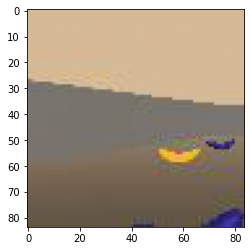

States have shape: (1, 84, 84, 3)


In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.visual_observations[0]
print('States look like:')
plt.imshow(np.squeeze(state))
plt.show()
state_size = state.shape
print('States have shape:', state.shape)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.visual_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.visual_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [31]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```